### En esta practica trabajamos con dos tipos de bases de datos. La base de datos de criticas de vinos, y la de resultados de analisis de cancer de mama en mamografias. Las tareas a realizar son:

## Tomar de referencia la practica 1, tomar solo UNA de las bases de datos y aplicar los metodos de analisis inicial de datos para describir la base de datos (Las columnas, tipos de datos, etc.)

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [5]:
bdvinos= pd.read_csv("C:\\Users\\carlm\\Desktop\\mineriaDeDatos\\MINERIA-DE-DATOS\\Practica2\\winemag-data_first150k.csv",index_col=0)

In [6]:
bdvinos.shape

(150930, 10)

In [7]:
bdvinos.head(5)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [8]:
bdvinos.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [9]:
bdvinos.min()

points    80.0
price      4.0
dtype: float64

In [10]:
bdvinos.max()

points     100.0
price     2300.0
dtype: float64

In [11]:
bdvinos.dtypes

country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object

In [12]:
bdvinos.country.unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

## Dar una descripcion estadistica basica (la primer parte de la practica, medias, covarianza, desviacion estandar, etc) de los datos de las columnas que a tu criterio ayudaran a entender mejor tus datos.

In [14]:
bdvinos['price'].describe()

count    137235.000000
mean         33.131482
std          36.322536
min           4.000000
25%          16.000000
50%          24.000000
75%          40.000000
max        2300.000000
Name: price, dtype: float64

Con el describe podemos obtener un monitor de infomracion util como la media, desviacion estandar de una columna, el valor minimo, el valor maximo, l

In [15]:
bdvinos['points'].describe()

count    150930.000000
mean         87.888418
std           3.222392
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

## Utilizar al menos dos formas de graficar con matplotlib y dos de seaborn para iniciar un analisis estadistico. (En total son 4 graficas las que tienen que hacer).

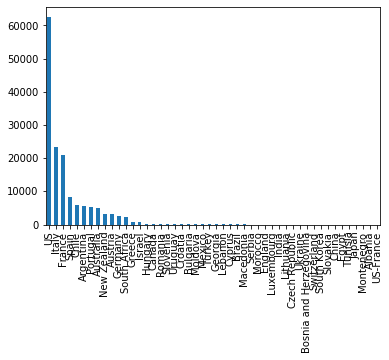

In [19]:
bdvinos['country'].value_counts().head(54).plot.bar()

Con la grafica de barras podemos comparar el numero de criticas de cada uno de los paises, esta informacion nos puede servir para obtener algun foco de interes. Saber cual es el pais con mas criticas y cual es que tiene menos o ver entre cuales paises esta la mayor cantidad criticas.

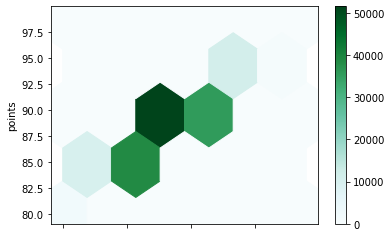

In [48]:
bdvinos[bdvinos['points'] < 100].plot.hexbin(x='points', y='points', gridsize=5)

Con la grafica Scatter plot de hexagonos podemos ver que en cuales puntos existen mas criticas, por ejemplo podemos ver aqui que entre 92.5 y 87.5 existe un cluster de criticas.

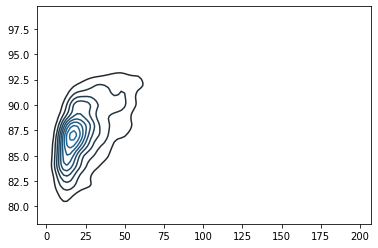

In [55]:
sns.kdeplot(bdvinos[bdvinos['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))

Con la grafica de distancia podemos ver los mismo que los histogramas, es decir tambien hacen uso de intervalos iguales. Podemos ver como se separan o incrementan las calificaciones cuando el precio se va elevando.

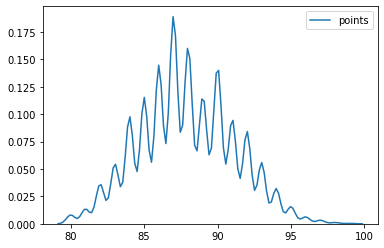

In [71]:
sns.kdeplot(bdvinos.query('points<100').points)

Con la graficas KDE podemos ver que tanto van varianod las puntuaciones de los vinos desde la calificacion mas baja, hasta la mas alta usando intervalos de puntos.

# Pregunta 1
Que representan los datos de la grafica de arriba.
Representan las freceuncuas y las probabilidades que tienen los datos que estan las columnas. (La grafica del documento visualizacion de datos).